In [56]:
from compas.datastructures import Mesh
import random

In [57]:
from compas_plotters import MeshPlotter

In [58]:
points = []
for i in range(100):
    x = random.random() * 16
    y = random.random() * 9
    points.append([x,y,0])

In [59]:
mesh = Mesh()
for p in points:
    mesh.add_vertex(x=p[0], y=p[1])

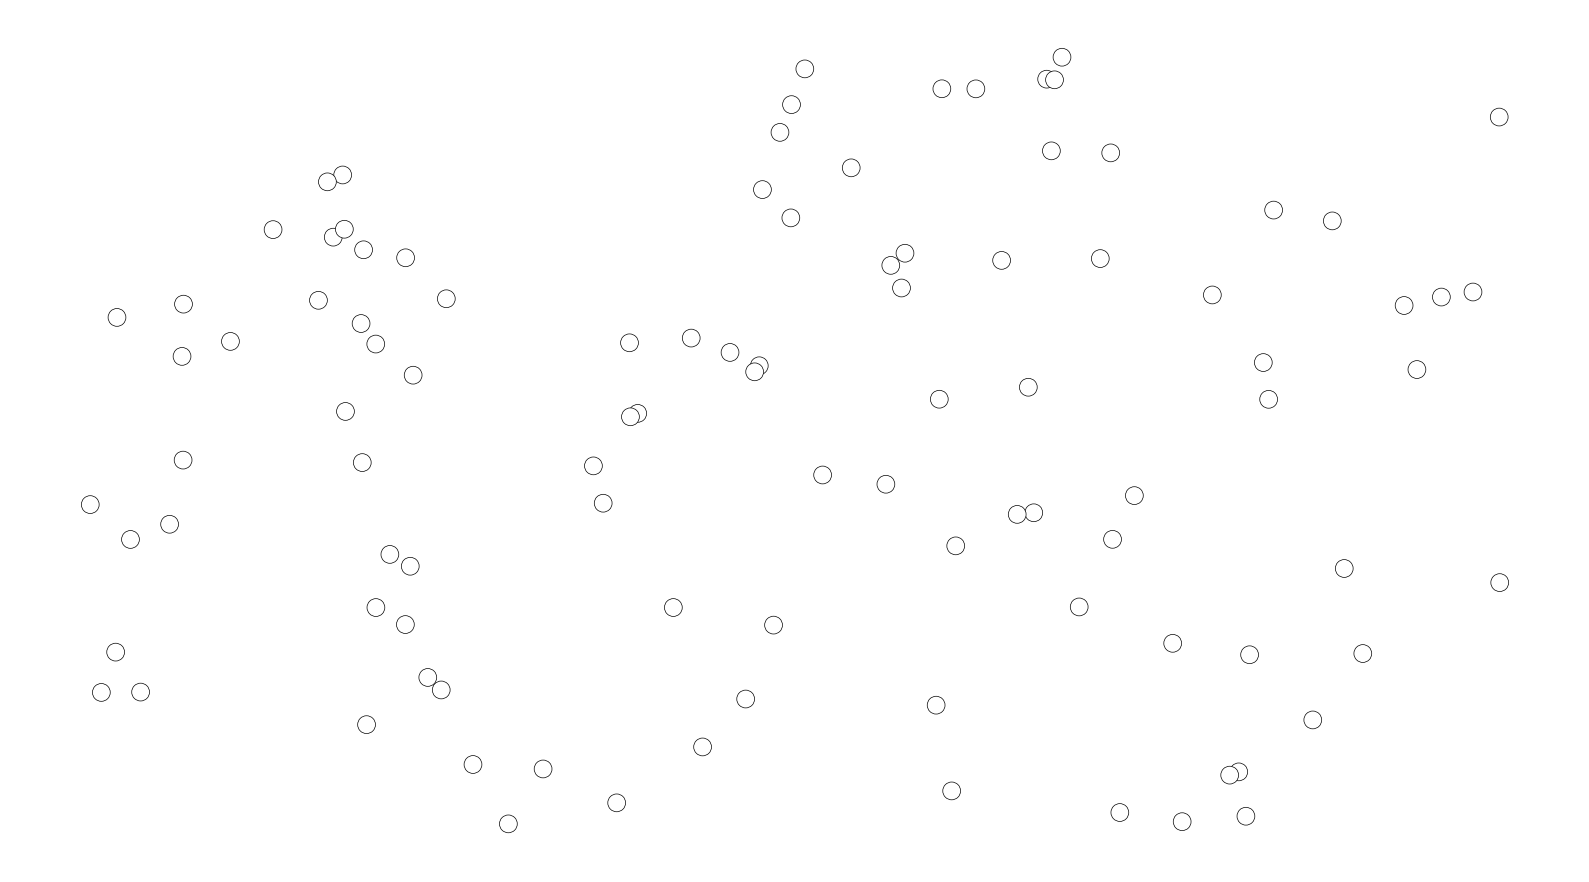

In [60]:
plotter = MeshPlotter(mesh)
plotter.draw_edges()
plotter.draw_faces()
plotter.draw_vertices()
plotter.show()

In [61]:
from compas.geometry import delaunay_from_points

In [62]:
faces = delaunay_from_points(points)

In [63]:
faces

[[10, 15, 11],
 [19, 24, 2],
 [27, 13, 4],
 [9, 26, 29],
 [30, 18, 22],
 [31, 24, 19],
 [31, 11, 15],
 [34, 12, 6],
 [12, 34, 32],
 [26, 36, 14],
 [37, 15, 10],
 [14, 36, 40],
 [0, 41, 28],
 [41, 0, 18],
 [32, 31, 42],
 [31, 15, 42],
 [20, 7, 43],
 [27, 43, 13],
 [43, 27, 20],
 [43, 35, 13],
 [35, 45, 38],
 [37, 48, 15],
 [23, 49, 39],
 [34, 6, 50],
 [46, 34, 50],
 [38, 51, 6],
 [51, 38, 45],
 [51, 50, 6],
 [50, 51, 46],
 [52, 33, 47],
 [30, 52, 47],
 [49, 23, 54],
 [54, 16, 33],
 [40, 36, 55],
 [33, 56, 47],
 [56, 33, 16],
 [56, 41, 47],
 [41, 56, 28],
 [3, 40, 57],
 [57, 25, 3],
 [21, 52, 58],
 [11, 31, 59],
 [31, 19, 59],
 [0, 60, 18],
 [29, 26, 61],
 [12, 32, 63],
 [37, 63, 48],
 [0, 64, 60],
 [64, 0, 8],
 [18, 60, 65],
 [65, 22, 18],
 [2, 24, 66],
 [67, 36, 26],
 [64, 67, 5],
 [48, 63, 68],
 [15, 68, 42],
 [68, 15, 48],
 [32, 68, 63],
 [68, 32, 42],
 [69, 64, 5],
 [55, 36, 70],
 [70, 40, 55],
 [25, 7, 71],
 [3, 71, 62],
 [71, 3, 25],
 [20, 71, 7],
 [9, 72, 26],
 [66, 72, 9],
 [72,

In [64]:
for f in faces:
    mesh.add_face(f)

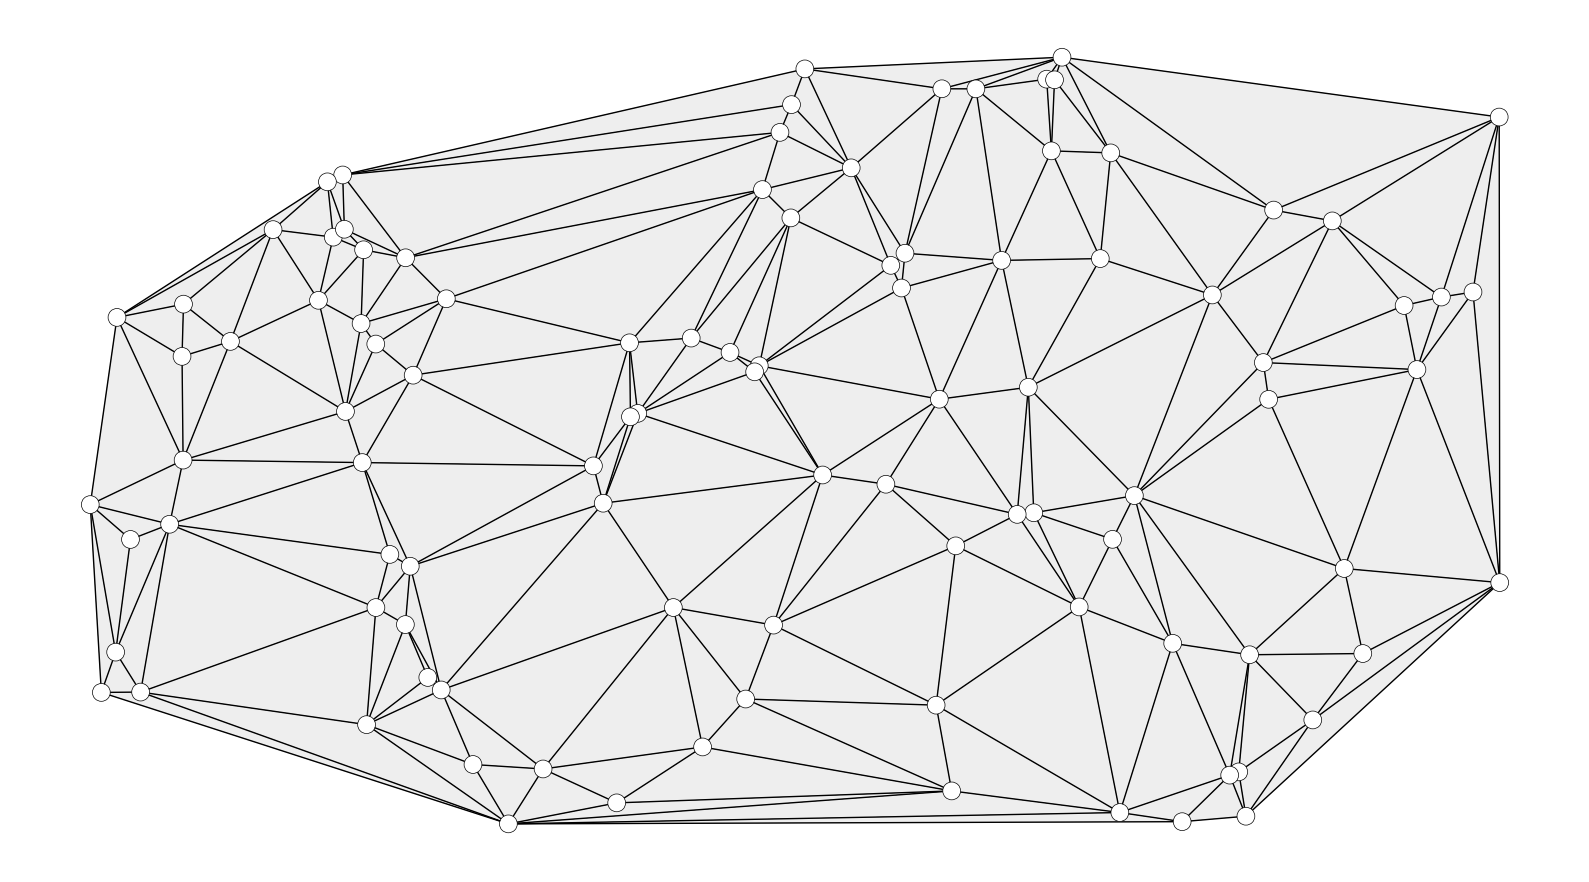

In [65]:
plotter = MeshPlotter(mesh)
plotter.draw_edges()
plotter.draw_faces()
plotter.draw_vertices()
plotter.show()

In [66]:
mesh2 = Mesh.from_vertices_and_faces(points, faces)

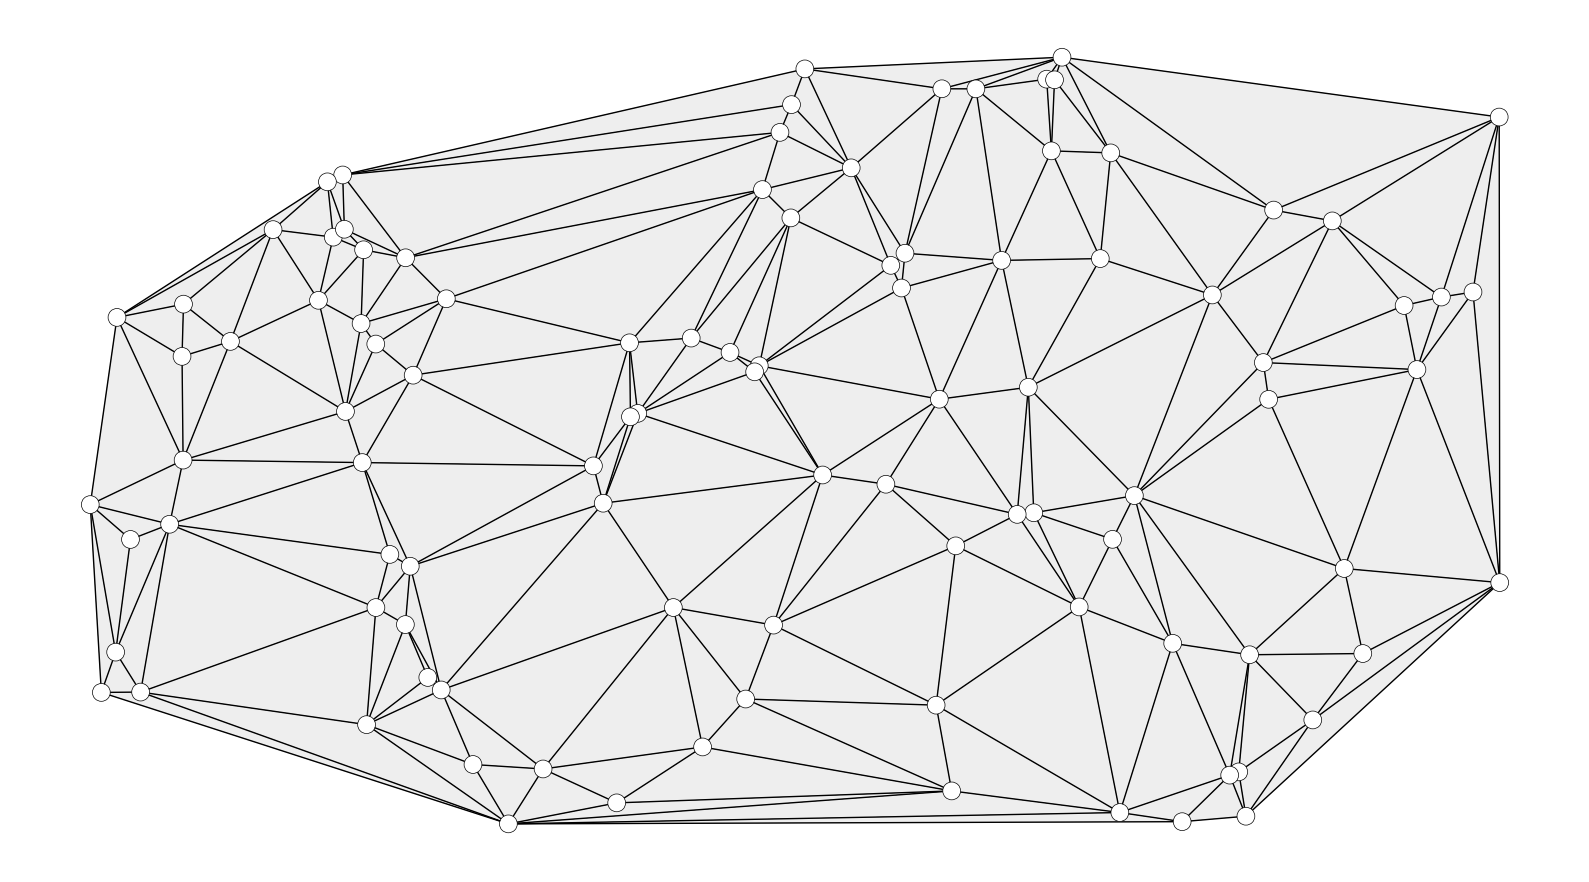

In [67]:
plotter = MeshPlotter(mesh2)
plotter.draw_edges()
plotter.draw_faces()
plotter.draw_vertices()
plotter.show()

In [83]:
colordict = {}
for fkey in mesh.faces():
    fa = mesh.face_area(fkey)
    colordict[fkey] = fa

In [84]:
area_max = max(colordict.values())

In [85]:
area_min = min(colordict.values())

In [86]:
for fkey in colordict:
    old_value = colordict[fkey]
    new_value = (old_value - area_min) / (area_max - area_min)
    colordict[fkey] = [new_value] * 3

In [87]:
max(colordict.values()), min(colordict.values())

([1.0, 1.0, 1.0], [0.0, 0.0, 0.0])

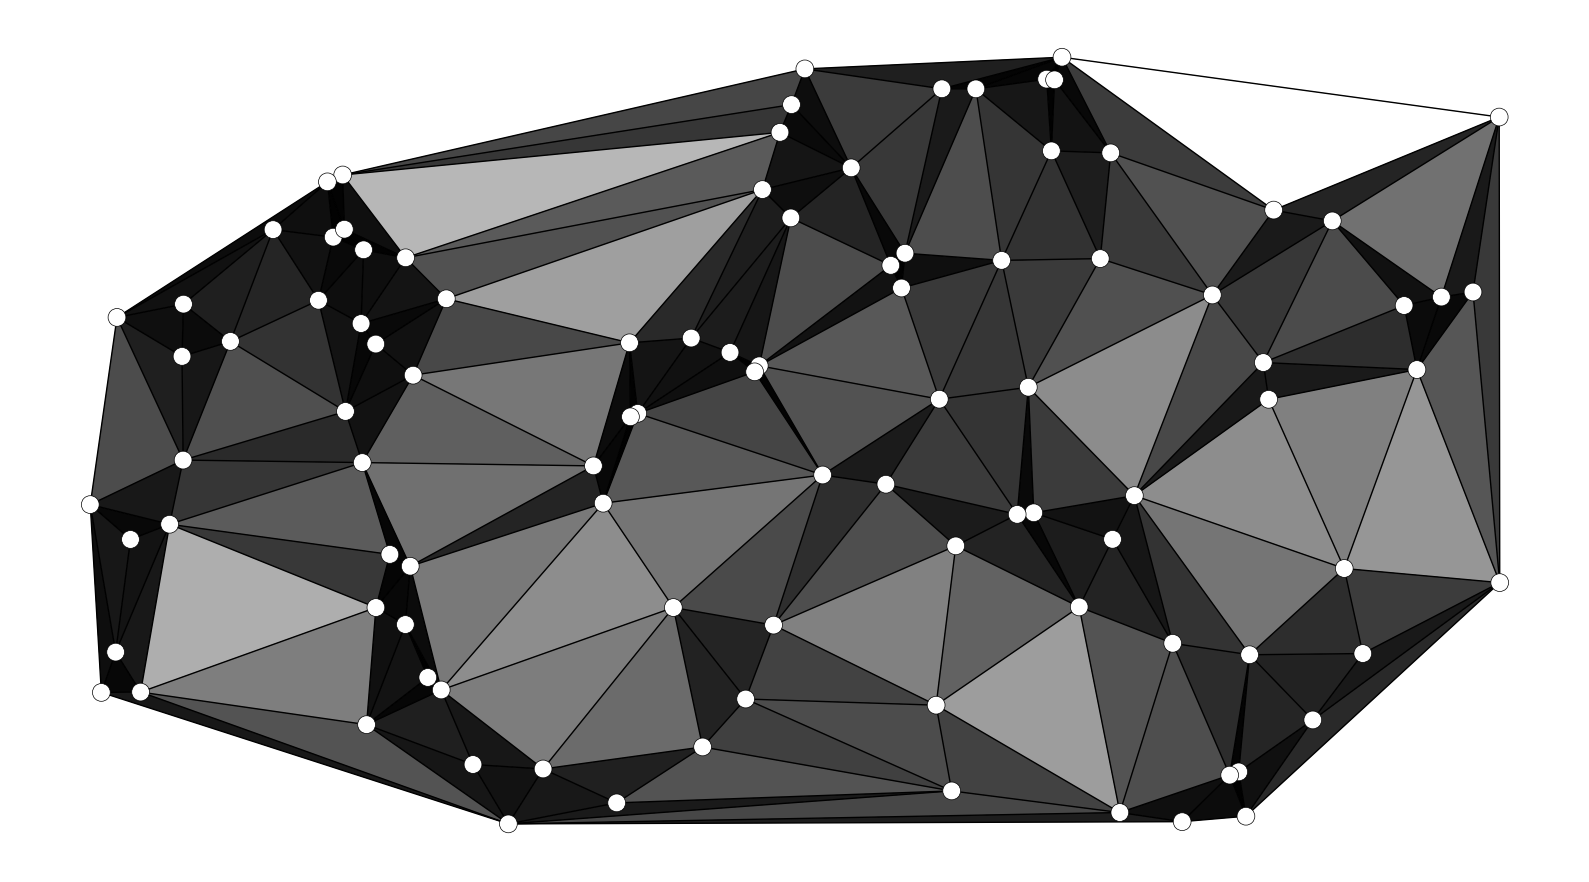

In [88]:
plotter = MeshPlotter(mesh)
plotter.draw_edges()
plotter.draw_faces(
    facecolor = colordict
)
plotter.draw_vertices()
plotter.show()

In [89]:
skewdict = {}
for fkey in mesh.faces():
    fs = mesh.face_skewness(fkey)
    skewdict[fkey] = fs

In [75]:
skew_max = max(skewdict.values())

In [76]:
skew_min = min(skewdict.values())

In [77]:
skew_min, skew_max

(0.0739003087882614, 0.9853889284407082)

In [90]:
for fkey in colordict:
    area_value = colordict[fkey]
    skew_value = skewdict[fkey]
    colordict[fkey] = [area_value[0], skew_value, 0.5]

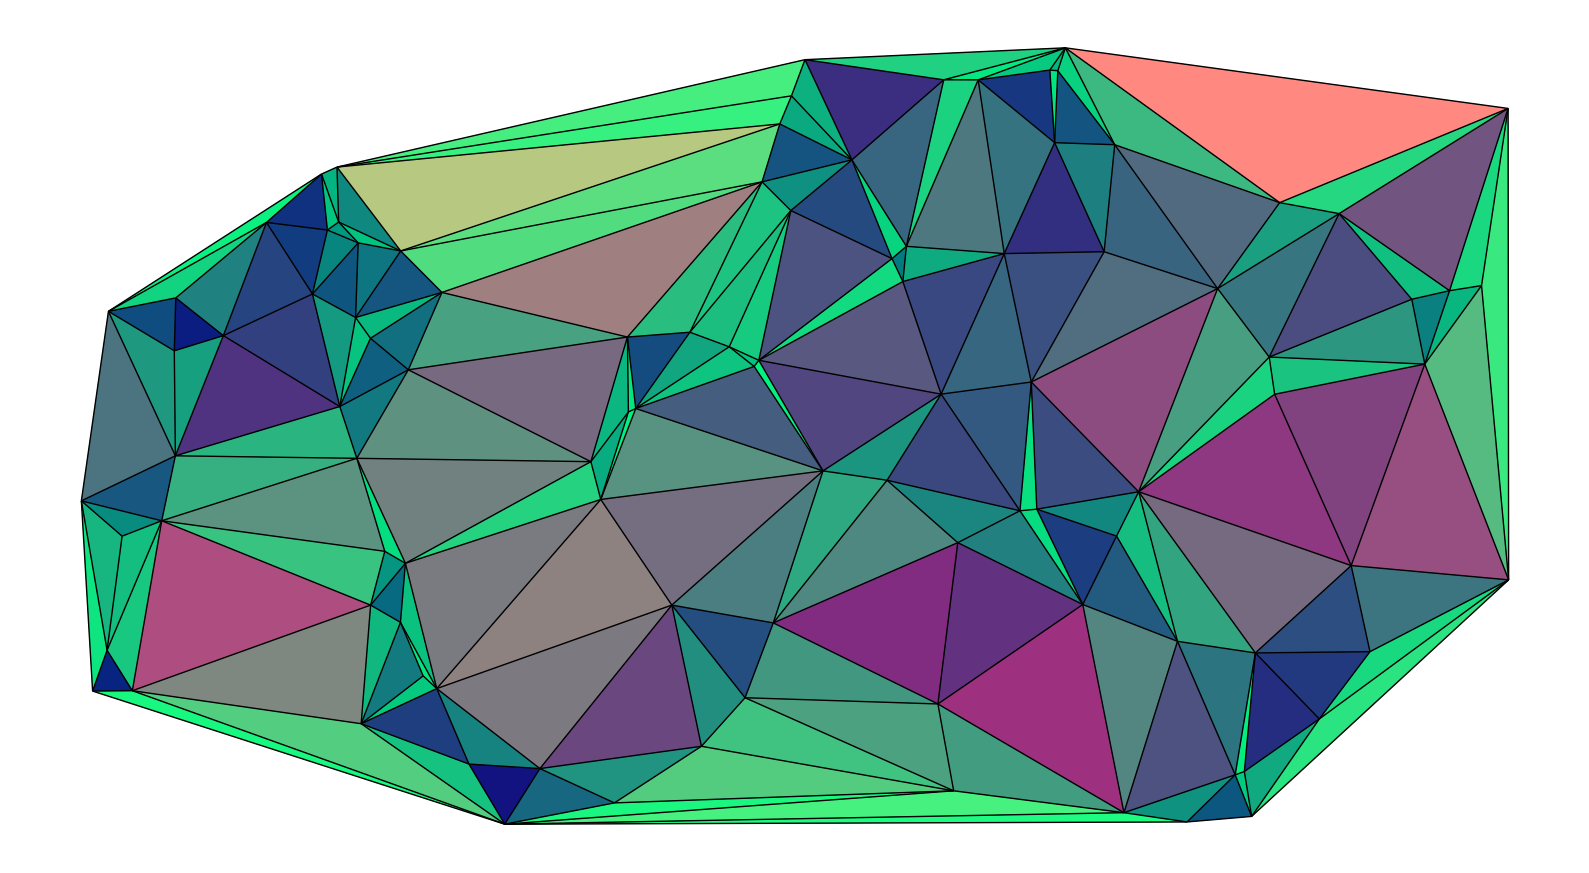

In [92]:
plotter = MeshPlotter(mesh)
plotter.draw_edges()
plotter.draw_faces(
    facecolor = colordict
)
#plotter.draw_vertices()
plotter.show()